<a href="https://colab.research.google.com/github/leehyell/AIStudy24/blob/master/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC 마켓에서 신상품으로 캔 와인을 판매하려고 한다.
<br/>
주류는 온라인 판매가 안 되므로 온라인 예약 후에 오프라인 매장에서 구매를 유도하고자 한다.
<br/><br/>
그런데, 입고된 와인을 보니 '레드 와인'인지 '화이트 와인'인지 표시가 안 되어 있음.
<br/>
캔에 인쇄된 알콜 도수, 당도, ph 값으로 와인 종류를 구분해보고자 한다.
* 품질 확인 용으로 뜯은 캔이 테스트 용으로 있음.
* 해당 캔을 데이터로 이용하여 로지스틱 회귀 모델로 적용할 예정.

In [81]:
#와인의 특성화된 데이터를 넣자.
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [82]:
#알콜, 당도, 산도, 클래스(타겟: 0 - 레드 와인 / 1 - 화이트 와인)
#데이터에서 화이트 와인이 양성 클래스로 화이트 와인을 표시하는 문제.
wine.info()
#결과 6497개의 샘플 4개의 열(실수)
#Non-null: 누락된 값이 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [83]:
#열에 대한 간단한 통계가 나옴.
wine.describe()
#count    : 개수
#mean     : 평균
#std      : 표준편차
#min      : 최소
#25%      : 1사분위
#50%      : 2사분위(중간값)
#75%      : 3사분위
#max      : 4사분위(100%)
#사분위수 : 데이터를 순서대로 4등분한 값.

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [84]:
#알콜도수와 당소 pH값의 스케일이 다름.
#StandardScaler 클래스로 특성을 표준화 해야함.

#와인 데이터 프레임에서 처음 3개의 열을 넘파이 배열로 바꿔서 data 변수에 저장
data = wine[['alcohol','sugar','pH']].to_numpy()
#class 열을 넘파이 배열로 바꿔서 target 변수에 저장
target = wine['class'].to_numpy()
print(data)
print('-'*23)
print(target)

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]
-----------------------
[0. 0. 0. ... 1. 1. 1.]


In [85]:
from sklearn.model_selection import train_test_split

#train_test_split() 함수는 설정 값을 지정하지 않으면 25%를 테스트 세트로 지정.
#test_size=0.2를 이용하여 20%만 테스트 세트로 지정.
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [86]:
print(f'훈련용: {train_input.shape}')
print('-'*17)
print(f'테스트: {test_input.shape}')

훈련용: (5197, 3)
-----------------
테스트: (1300, 3)


In [87]:
from sklearn.preprocessing import StandardScaler

#훈련 세트 전처리
ss = StandardScaler()
ss.fit(train_input)

#표준점수로 변환: 단위를 맞추는 효과
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled)
print('-'*39)
print(test_scaled)

[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 ...
 [-0.82568214  0.0267578   0.14437512]
 [-0.82568214  0.52716215 -0.23153545]
 [-0.82568214 -0.57789745  1.83597265]]
---------------------------------------
[[ 1.44082714  1.52797084  0.26967864]
 [-0.48990299 -0.68214836  0.3323304 ]
 [ 1.27293756  0.40206106 -0.23153545]
 ...
 [ 1.60871671 -0.76554908 -0.16888369]
 [-0.90962693  0.88161523  0.52028568]
 [-1.49724045  2.09092573 -1.98578474]]


In [88]:
from sklearn.linear_model import LogisticRegression

#로지스틱 회귀모델
lr = LogisticRegression()

#훈련 시작
lr.fit(train_scaled, train_target)

#훈련용 점수(0.7808350971714451)
print(lr.score(train_scaled, train_target))
#테스트용 점수(0.7776923076923077)
print(lr.score(test_scaled, test_target))

#결론: 80점 이하로 점수가 낮게 나옴(과소 적합)

0.7808350971714451
0.7776923076923077


In [89]:
#제출용 보고서를 만들어 보자.

#로지스틱 회귀(계수, 절편)
#계수: 가중치, 절편: 더해지는 값
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [90]:
#알콜 도수 값에 0.51268071을 곱하고,
#당도에 1.67335441을 곱하고,
#pH 값에 -0.68775646을 곱한 다음, 모두 더함.
#위에서 나온 값에 1.81773456을 더함.
#이 값이 0보다 크면 화이트 와인, 작으면 레드 와인.
#현재 77% 정도 정확하게 화이트 와인으로 분류 완료.

In [91]:
#결정 트리(이유를 설명해보자.)
#if문을 사용하는 것과 유사
#Decision - 결정
from sklearn.tree import DecisionTreeClassifier

#DecisionTreeClassifier 결정 트리 모델로 훈련
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

#훈련 세트
print(dt.score(train_scaled, train_target))
#테스트 세트
print(dt.score(test_scaled, test_target))

#훈  련 : 0.996921300750433
#테스트 : 0.8592307692307692
#결  론 : 과대 적합됨

0.996921300750433
0.8592307692307692


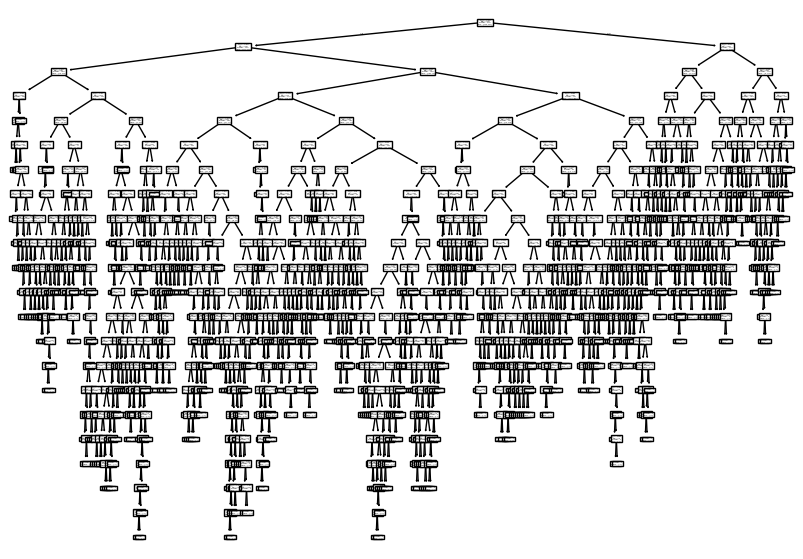

In [92]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#figsize=(20,15): 그래프의 사이즈(가로인치, 세로인치)
plt.figure(figsize=(10,7))
plot_tree(dt)

#맨 위 노드   : 루트 노드
#맨 아래 노드 : 리프 노드
plt.show()

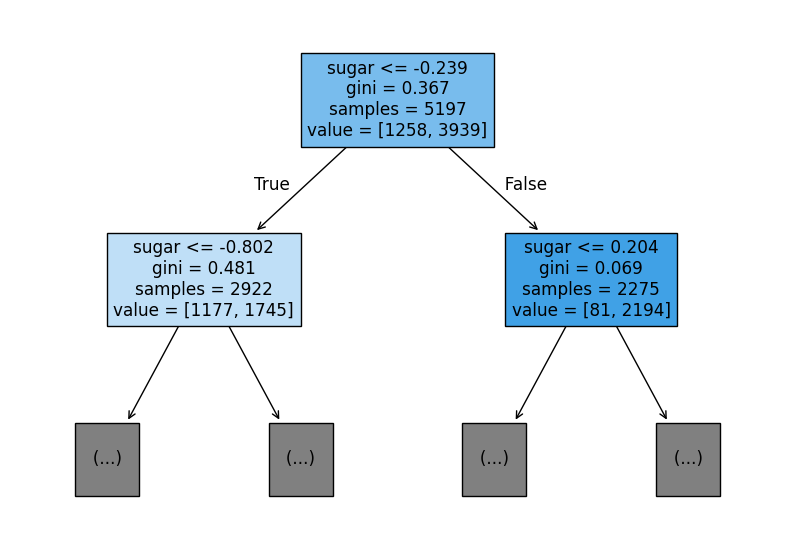

In [93]:
plt.figure(figsize=(10,7))

#max_depth=1   : 루트노드를 제외
#filled=True   : 클래스에 맞게 색칠
#feature_names : 특성 이름
plot_tree(dt, max_depth=1, filled=True, feature_names=['alchol','sugar','pH'])

plt.show()
#sugar가 -0.239 같거나 작으면 True(왼쪽 가지)
#sugar가 -0.239 초과이면 False(오른쪽 가지)
#gini   - 불순도(0.367)
#sample - 총 샘플 수(5,197개)
#value  - 값(1258(1), 3939(0))

#총 샘플수   : 5,197개
#레드 와인   : 1,258개
#화이트 와인 : 3,939개

#아래쪽 노드의 왼쪽 노드를 살펴보자.
#이 노드는 당도가 더 낮은지를 물어보는 노드(-0.802)
#당도가 -0.802 이하면 왼쪽, 그렇지 않으면 오른쪽으로 이동.
#하단의 왼쪽   : (음성 클래스 1,177개, 양성 클래스 1,745개)
#하단의 오른쪽 : (음성 클래스 81개, 양성 클래스 2,194개)
    #대부분의 화이트 와인 샘플이 이 노드로 이동됨.

In [94]:
#노드의 바탕색을 유심히 보면 루트 노드보다 더 진하고, 왼쪽 노드는 연해짐.
#filled=True 로 지정하면, 클래스 마다 색깔을 지정 및 비율이 높아지면 점점 진해짐.
#결정 트리에서 예측하는 방법은 간단한데, 리프노드에서 가장 많은 클래스가 예측 클래스가 됨.

#만약 이 결정 트리로 설장을 멈춘다면,
#왼쪽 노드에 도달한 샘플과 오른쪽 노드에 도달한 샘플은 모두 양성 클래스로 예측됨.
#→ 양성 클래스가 많기 때문.

#gini : `불순도`로 노드에서 데이터를 분할할 기준을 정하는 값

In [95]:
#가지치기
#└ 열매를 잘 맺기 위해 가지치기를 하듯이 결정트리에서도 사용한다.
#가지치기를 하지 않으면 무작정 끝까지 자라나는 트리를 만든다.
#트리의 깊이(depth)를 지정하면 된다.

#트리의 깊이(max_depth): 3
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

#↓ 0.8454877814123533
print(dt.score(train_scaled, train_target))
#↓ 0.8415384615384616
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


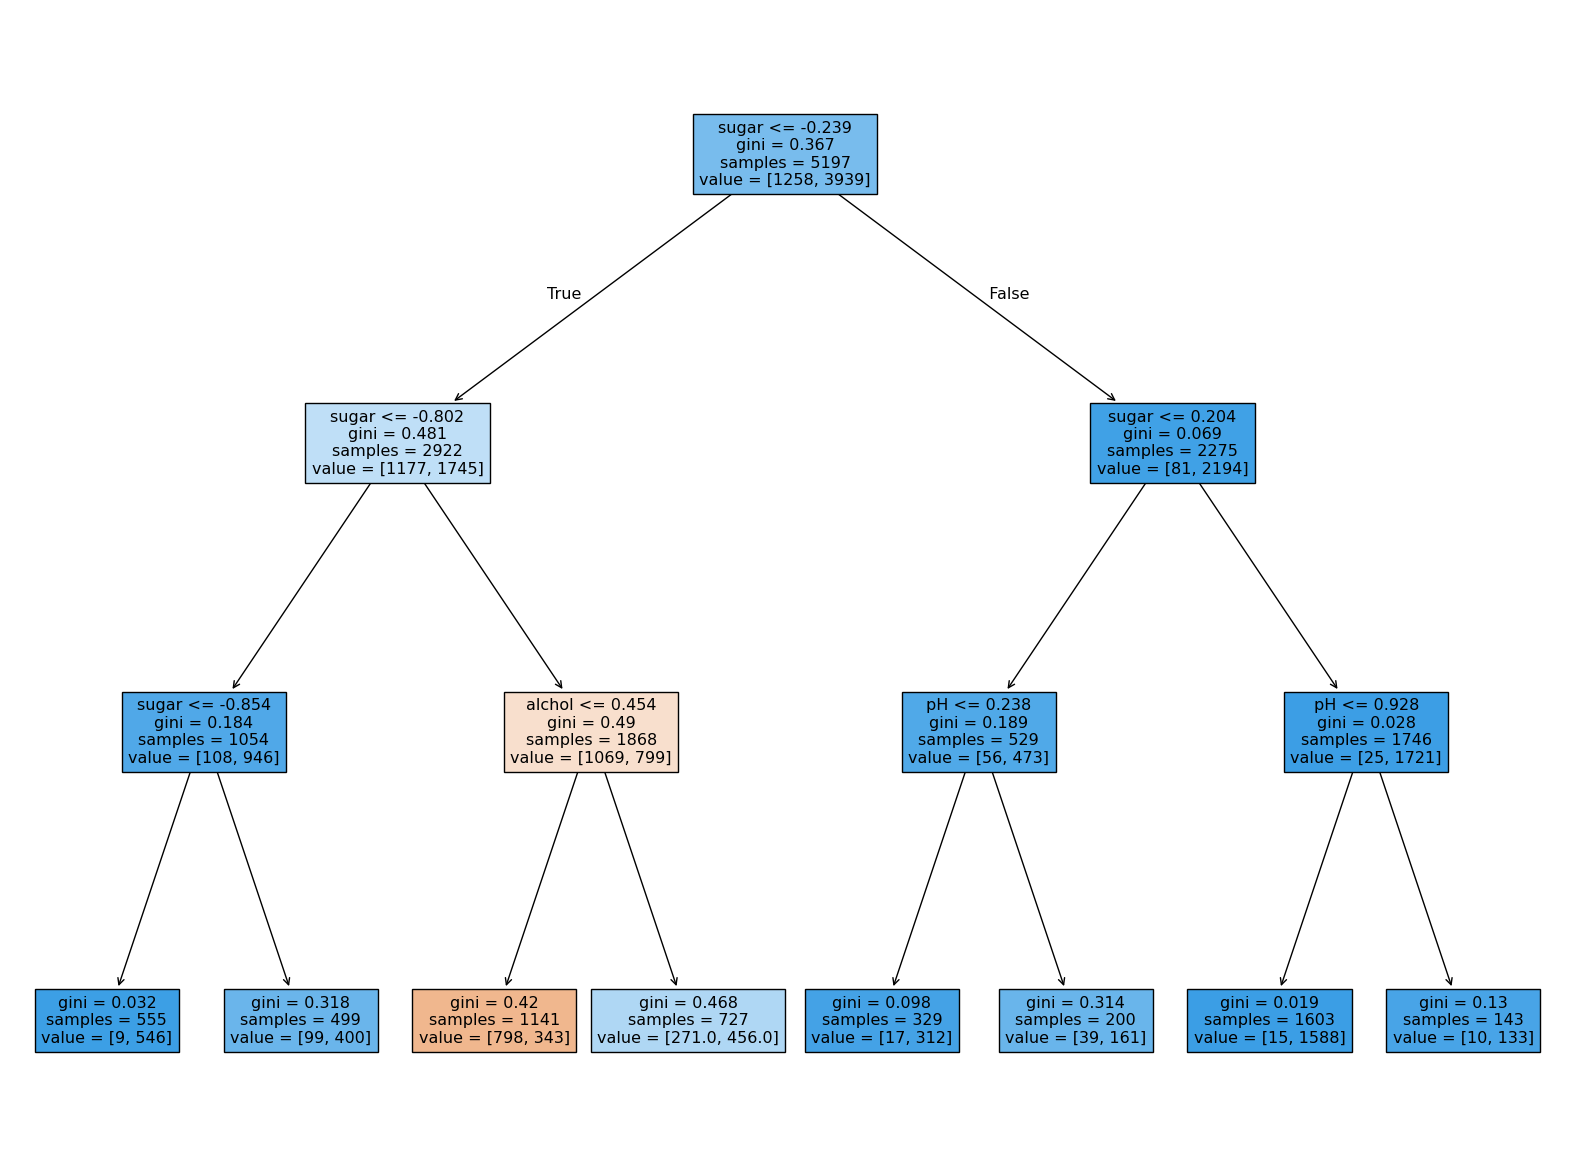

In [96]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchol','sugar','pH'])
plt.show()

In [97]:
#그래프 분석
#루트 노드(depth=0)
#다음 깊이에 있는 노드.(depth=1)
#노드는 모두 당도를 기준으로 훈련 세트를 나눔.
#하지만 depth=2에서는 맨 왼쪽 노드만 당도를 기준으로 나누고 왼쪽에서 두번째 노드는 알콜 도수를 기준으로 나눔.
#오른쪽 두 노드는 pH를 사용함.

#깊이 3에 있는 노드가 최종 노드인 리프 노드.
#왼쪽에서 세 번째에 있는 노드만 음성 클래스가 더 많다.
#→ 이 노드에 도착해야만 레드와인으로 예측.

#결론: 당도는 -0.239보다 작고, -0.802보다는 커야함.
#      알콜 도수는 0.454보다 작으면 레드 와인.

In [98]:
# -0.802라는 음수로 된 당도를 상사에게 보고할 수 있는가??
#표준화 전처리 없이 결정 트리를 사용해보자.
#여기서는 특성값의 스케일이 효과가 없다.

In [99]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

#↓ 0.8454877814123533
print(dt.score(train_input, train_target))
#↓ 0.8415384615384616
print(dt.score(test_input, test_target))
#표준화 점수를 사용하지 않아도 확률이 거의 비슷.
#표준화 점수 사용 안 함.

0.8454877814123533
0.8415384615384616


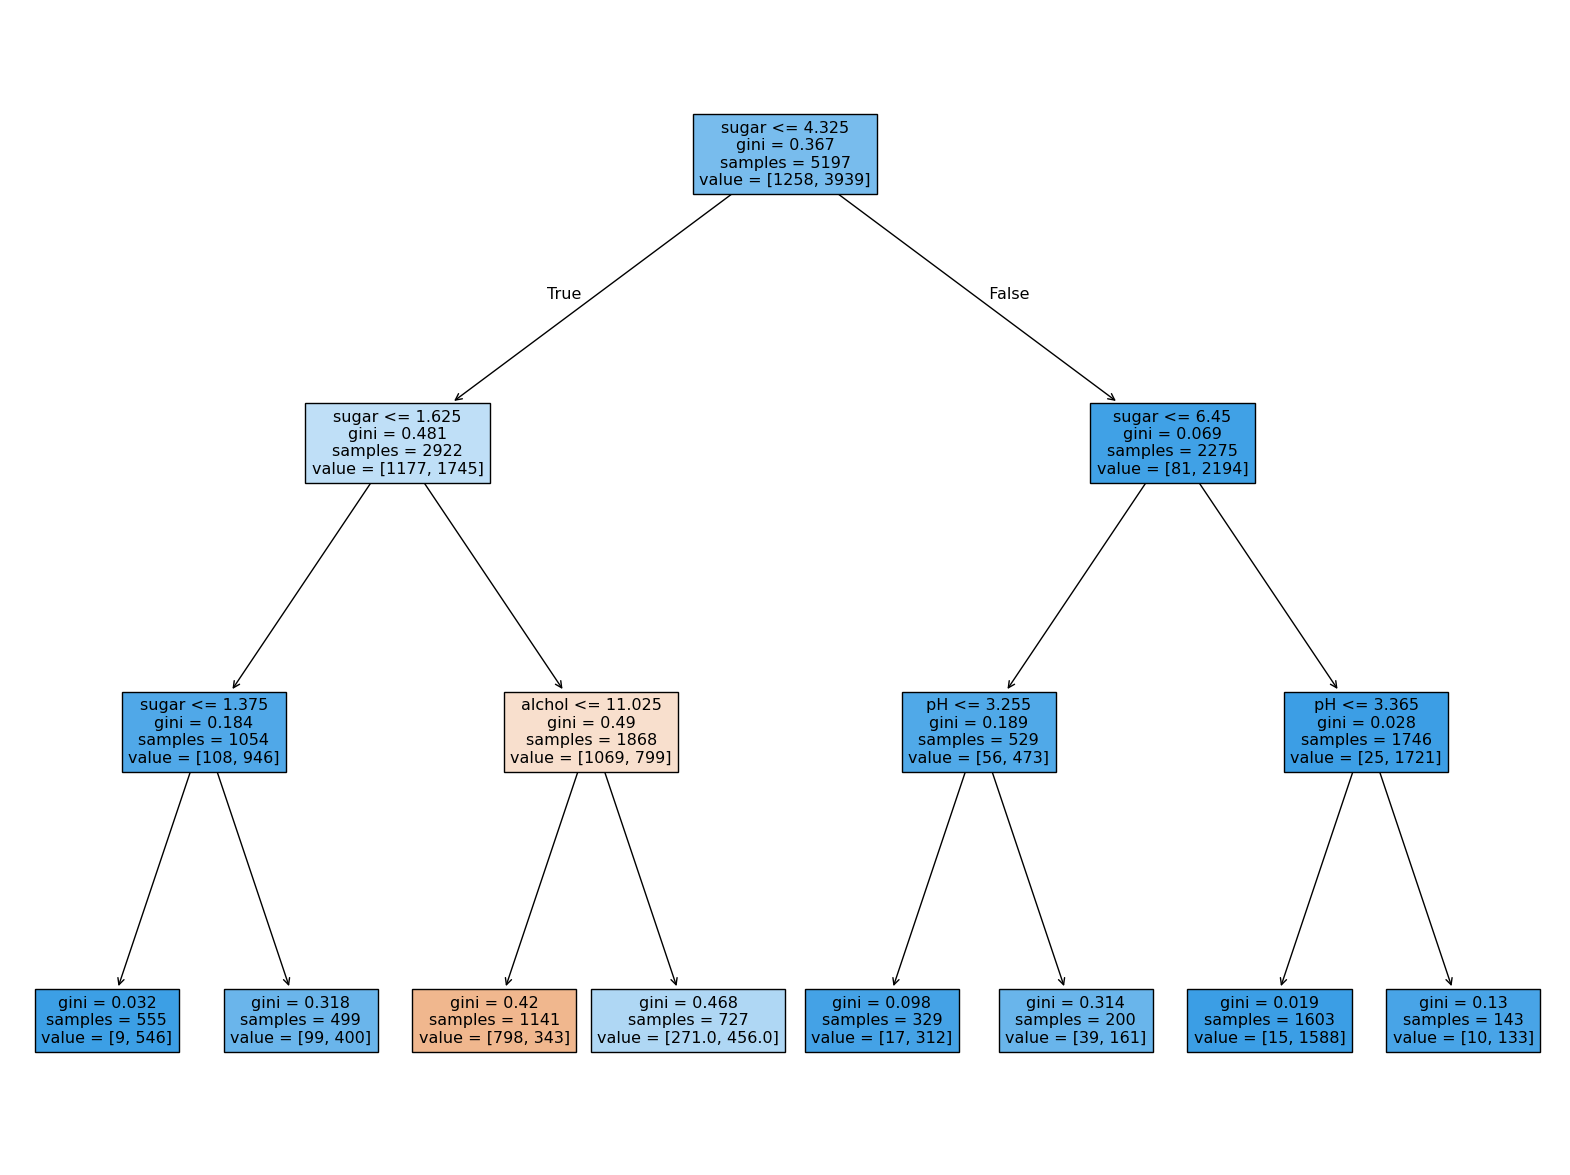

In [100]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchol','sugar','pH'])
plt.show()

In [101]:
#당도가 1.625보다 크고 4.325보다 작은 와인 중
#알콜 도수가 11.025와 같거나 작은 것이 레드와인으로 판단됨.

In [102]:
#결정 트리는 어떤 특성이 가장 유용했는지 나타내는 특성 중요도를 계산해줌.
print(dt.feature_importances_)
#  alchol      sugar       pH    → 순서는 입력 값 그대로.
#0.12345626 0.86862934 0.0079144 → 다 더했을 때 1이 나와야 함.


[0.12345626 0.86862934 0.0079144 ]


In [105]:
#좌우가 균일하지 않은 트리
#min_impurity_decrease : 최소 불순도.
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

#↓ 0.8454877814123533
print(dt.score(train_input, train_target))
#↓ 0.8415384615384616
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


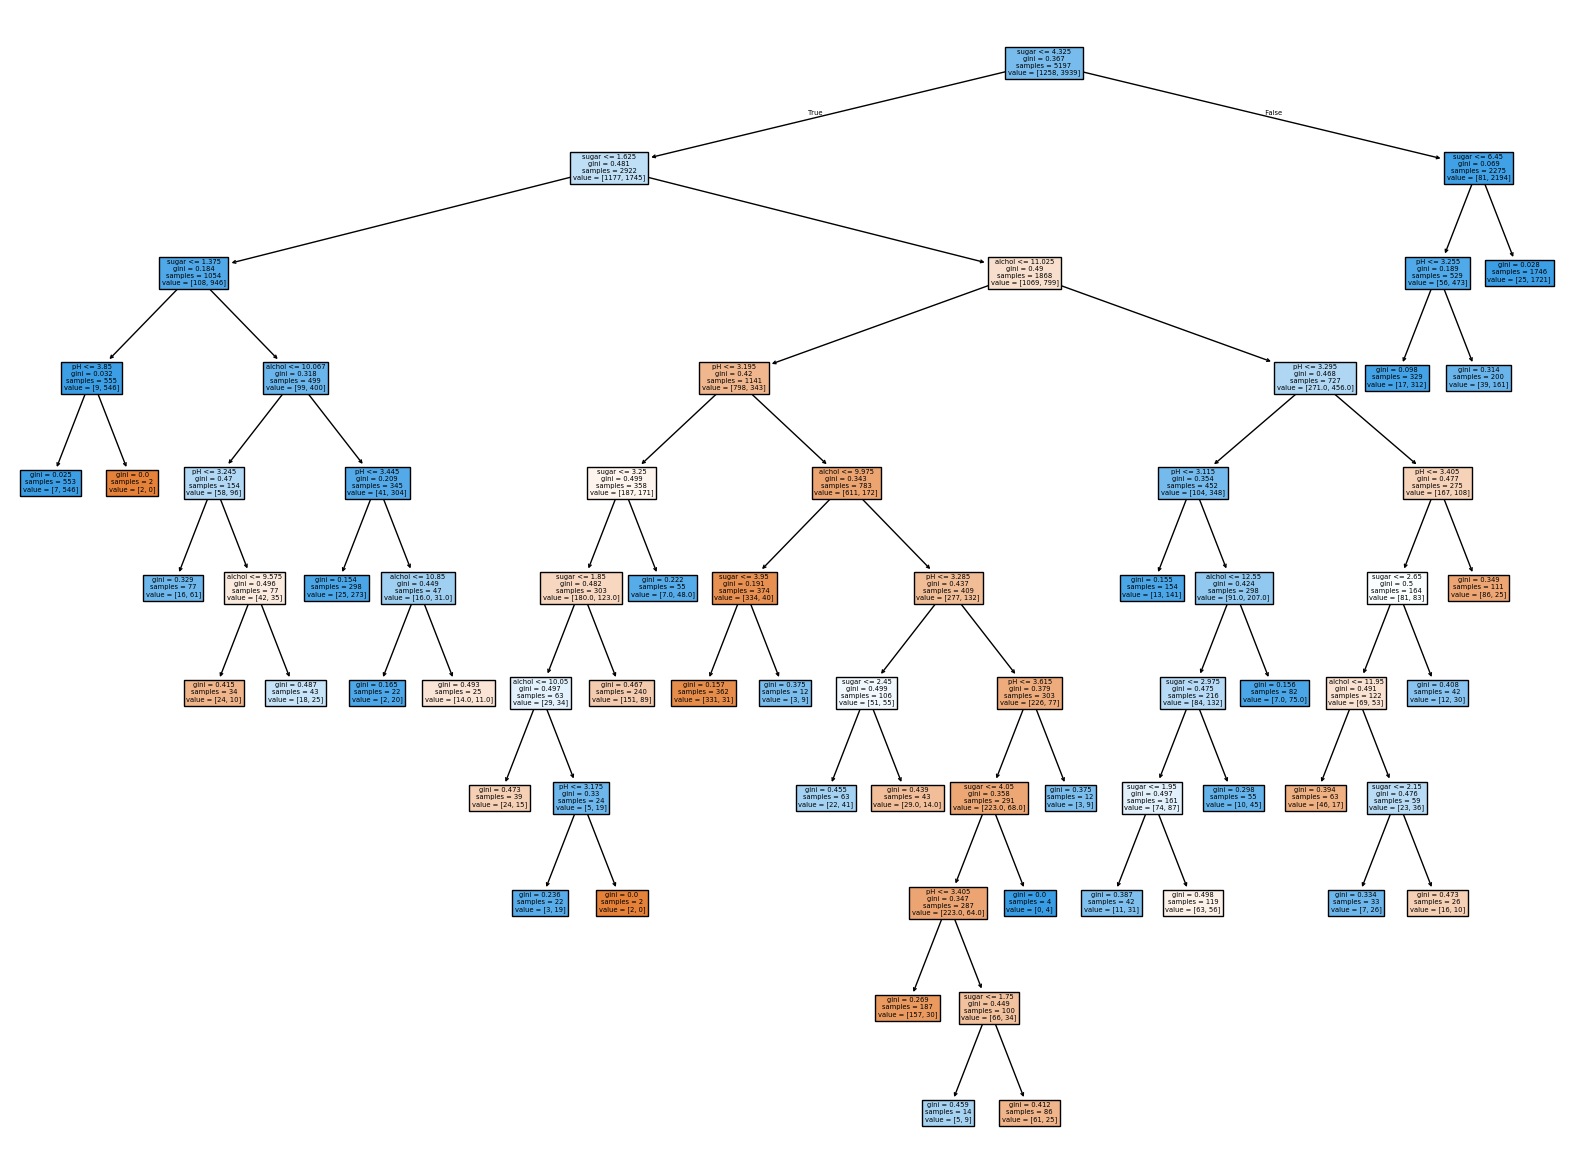

In [106]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchol','sugar','pH'])
plt.show()